# 경제학 특강3 - 6조 발표

### 연구 주제 및 방향

국내 IT 상장 기업의 주가는 기업의 재무적 성과, 이벤트 외에도 국외 시장 변수의 영향을 받는 경우가 많다. 이 연구는 국내 IT 산업에 영향을 미치는 국외 지수는 어떤 것이 있고, 또 얼마나 설명력이 있는지 확인하는 것을 그 목표로 두었다.

IT 기업 중 시가 총액이 가장 큰 삼성전자와 IT 소프트웨어 기업 중 시가 총액이 가장 큰 네이버를 분석 대상으로 선정했다. 설명 변수로는 IXT지수, VIX지수, 비트코인 가격, 미국 10년채 금리, MSCI 신흥국 지수를 선택했다. 이후 1변수부터 5변수까지 넣고 각각에 대해 OLS를 돌려서 총 82가지의 경우의 수로 나누어 상관관계를 살펴보는 방식으로 연구를 진행했다. 각 변수마다 2016년 1월 1일부터 2018년 12월 31일까지 3개년에 걸친 일별 자료를 활용하였다.


+ Top 50 matplotlib  
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

+ Top 21 Samsung Competitors – Competitor analysis of Samsung  
https://www.marketing91.com/samsung-competitors/  



# INDEX<a name="INDEX"></a>
---
+ [초기설정(필수)](#초기설정)
+ [심볼리스트 생성](#init)
+ [데이터 다운로드](#down)
+ [OLS](#ols)
+ [Joint Plot](#joint)
+ [데이터확인](#확인)
+ [co-kurtosis - WIP](#cokur)
+ [correlation](#corr)

# Note
---
+ read_csv 에서 오류가 난다면 Analyze.py에

```python
engine = 'python'
```
를 추가해 줘보자.

```python
pd.read_csv('data/'+target_1 + '.csv',index_col='Date',engine='python')
```

+ csv 파일이 제대로 되어있는지 확인하여보자  
        메모장으로 열었을 시에 제대로 ',' 로 구분되어야한다.  
        엑셀 파일을 받아서 csv로 변환이 잘 안되는 경우가 있다.

+ 출력이 스크롤 안에 안 들어가게 하기  
        Cell -> All output (또는 Current outputs) -> toggle scrolling  
        또는 cell 선택후 'o'

### [초기 설정](#INDEX)<a name="초기설정"></a>
+ 한글 출력을 위한 폰트 설정, 각 PC마다 환경이 다름 ([matlplot 한글폰트](matlplot%20한글폰트.ipynb).ipynb 참고)
+ 사용할 지표들 등록

In [4]:
import SymbolList as sl
import Analysis as an
import Visualization as vi
import numpy as np
import pandas as pd
import datetime as dt 
from statsmodels.formula.api import ols 
import seaborn as sns;  sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl

# matplot 설정
mpl.rcParams['axes.unicode_minus'] = False
# -*- coding: utf-8 -*-
plt.rc('font', family="LG PC")
# 리스트 설정
ten_kor = ['Samsung_Electronics','SK_hynix','LG_Electronics',
    '삼성SDI','엔씨소프트','카카오','삼성전기',
    'LG디스플레이','삼성SDS','네이버']
ten_US = [  'Apple','Microsoft','IBM','Oracle',
            'Amazon','Tesla','Alphabet','Facebook',
            'Cisco','타이완 반도체','Intel','오라클','SAP']
index_kor = '와이즈'
#index_US = 'IXT'
index_US = 'XLK'
#stan_US = ['IXT','VIX','BitCoin','MSCI','ten_Year_Treasury']
#stan_US = ['XLK','VIX','BitCoin','MSCI','ten_Year_Treasury']

# IT 기업들 
stan_US = ['XLK','ten_Year_Treasury','Apple','NVIDIA','AMD','퀄컴']

### 지표 index
+ [와이즈](http://www.wiseindex.com/Index/Index#/WI610.0) - 와이즈 IT하드웨어 지수
+ [IXT](https://finance.yahoo.com/quote/%5EIXT?p=^IXT&.tsrc=fin-srch) : TECHNOLOGY SELECT SECTOR INDEX  - 현재 미사용, 온전한 3년치를 얻을 방법을 못 찾음
+ [XLK](https://finance.yahoo.com/quote/XLK?p=XLK&.tsrc=fin-srch): Technology Select Sector SPDR Fund 
+ [VIX](https://finance.yahoo.com/quote/ZM?p=ZM&.tsrc=fin-srch) : VelocityShares Daily 2x VIX Short-Term ETN(a.k.a 공포지수), S&P500지수 옵션 가격의 향후 30일 동안의 변동성에 대한 시장의 기대
+ [MSCI](https://finance.yahoo.com/quote/EEM?p=EEM&.tsrc=fin-srch) : iShares MSCI Emerging Markets ETF
+ [ten_Year_Treasury](https://finance.yahoo.com/quote/IEF?p=IEF&.tsrc=fin-srch) : iShares 7-10 Year Treasury Bond ETF

### 지표 설명

    IXT 지수는 S&P 500에 포함된 기업 중 IT 기업의 시가 총액 지수로 국내 IT 산업 주가가 미국 IT 산업 지수의 영향을 받는지 확인하기 위해서 설명 변수에 편입했다. 해당 지수를 직접 구할 수 없어 이를 대체할 자료로 Technology Select Sector SPDR Fund(XLK)를 이용했다. 이는 S&P 지수 펀드 중 하나로 시가 총액 비중으로 펀드를 담고 있어 비교적 정확한 대체 자료로 사용할 수 있다고 판단했다.
    
	VIX 지수는 S&P 500 지수 옵션 가격의 향후 30일 동안의 변동성에 대한 시장의 기대를 수치화한 자료로, 앞으로 미국 주식 시장에 대한 변동성이 국내 IT 산업에 영향을 미칠 수 있는지를 확인하기 위해 편입했다. 세계 주식 시장의 변동성이 커지고 위험이 높아질수록 신흥국의 자금이 빠져나가는 경우가 종종 있기 때문에 이를 검증하기 위해서 설명 변수에 포함시켰다.
    
	비트코인 가격은 IT 하드웨어 산업의 수요와 관련이 있다고 판단하여 포함시켰다. 비트코인의 가격이 증가하고 시장의 관심이 집중됨에 따라 비트코인을 채굴하기 위해 고사양의 반도체 수요가 높아졌다. 삼성전자는 메모리를 팔고 있기 때문에 직접적으로 큰 연관은 없었으나 세계 반도체 시장의 수요 증가가 삼성전자의 주가 상승과 유의미한 상관관계를 갖고 있는지 검증하고자 했다.
    
	미국 10년채 금리는 전체적인 시장의 경기 상황을 파악하기 위해서 포함시켰다. 미국 중장기채 금리는 시장의 다양한 거시 변수와 그에 대한 기대를 반영하고 있기 때문에 경기 파악을 위하여 가장 최적의 변수라고 생각했다. 다만, 미국 연방준비제도가 발표하는 금리가 아니라, 10년채 유통시장의 가격을 이용했다. 이를 위해 iShares 7-10 Year Treasury Bond ETF 자료를 이용했다. 국채 가격은 금리와 역의 관계를 갖고 있기 때문에 이를 참고하여 수치를 해석하였다.
    
	MSCI 신흥국 지수는 외국 자금의 프로그램 매매 영향을 확인하기 위해 설명 변수에 포함했다. 해당 지수에 새로운 신흥국이 포함될 경우 국내 비중이 줄어들면서 프로그램 매매에 의해 국내 주식 시장의 자금이 빠져나가기 때문에 이를 확인하고자 했다. 또, 세계 경제의 불확실성이 커질 경우 신흥국의 자금은 유출되고 미국으로 몰리는 경향이 있는데 이를 잘 표현하는 지수가 MSCI 신흥국 지수라고 생각하여 이를 확인할 수 있는 변수로 판단하였다.


# [OLS ](#INDEX)<a name="ols"></a>
```python
def ols_comb(             
           dep,inds,
           comb_num=1,
           show_summary = False,
           do_shift = True,
           show_plot = True,  
           show_line = False,
           weekly=True,
           start='2016-01-04',
           end='2018-12-28',
           engine='c'
            )
    ```

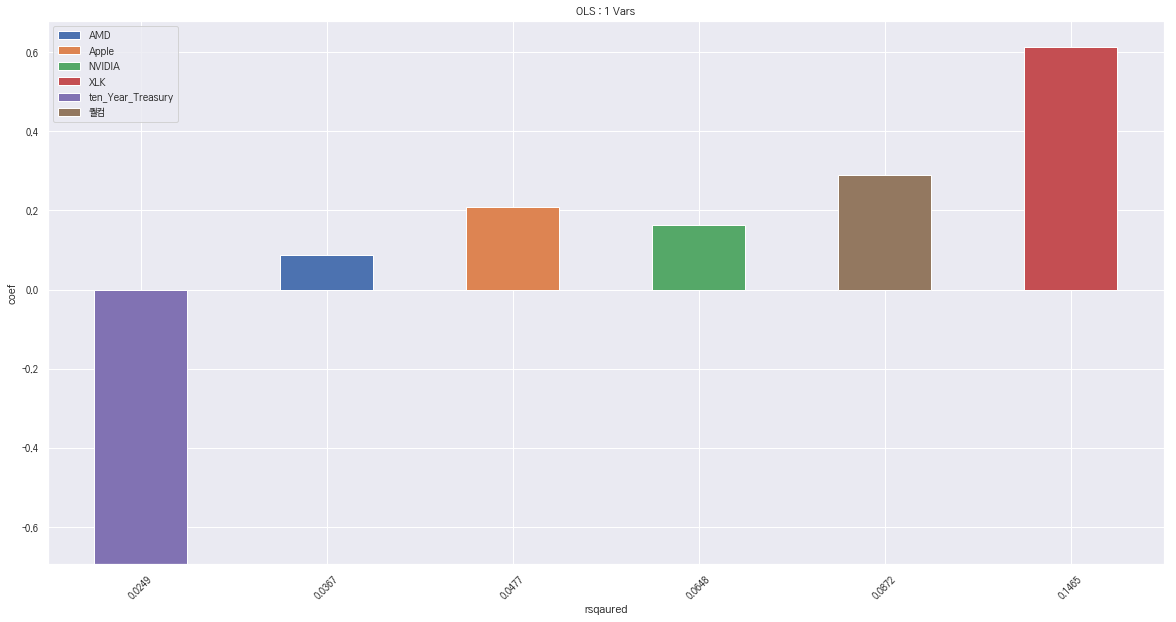

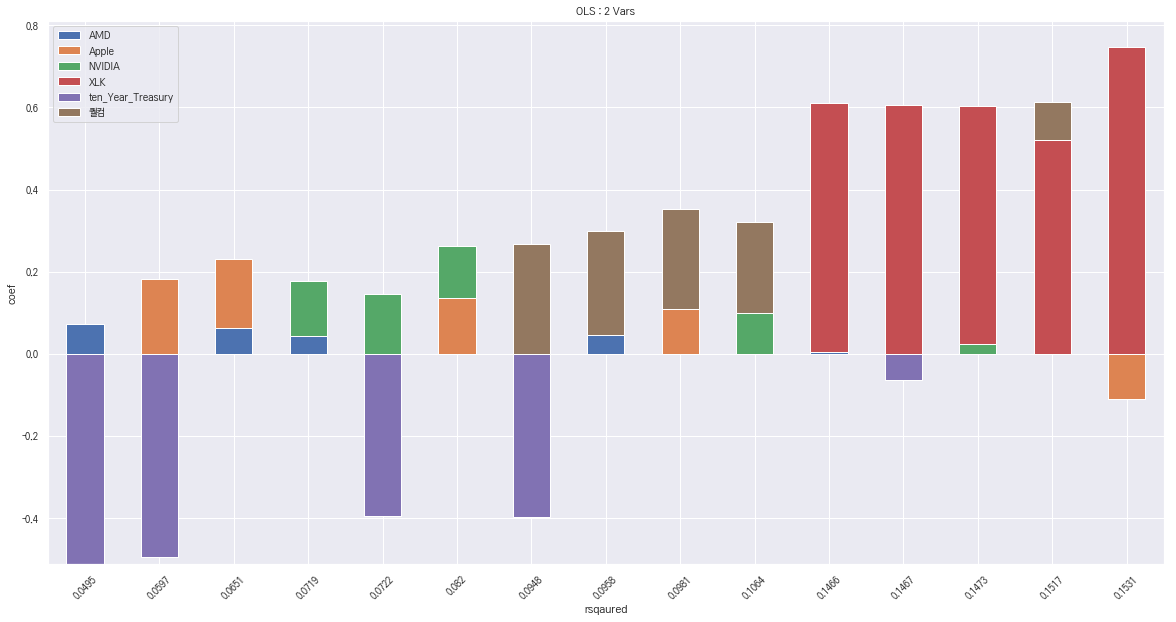

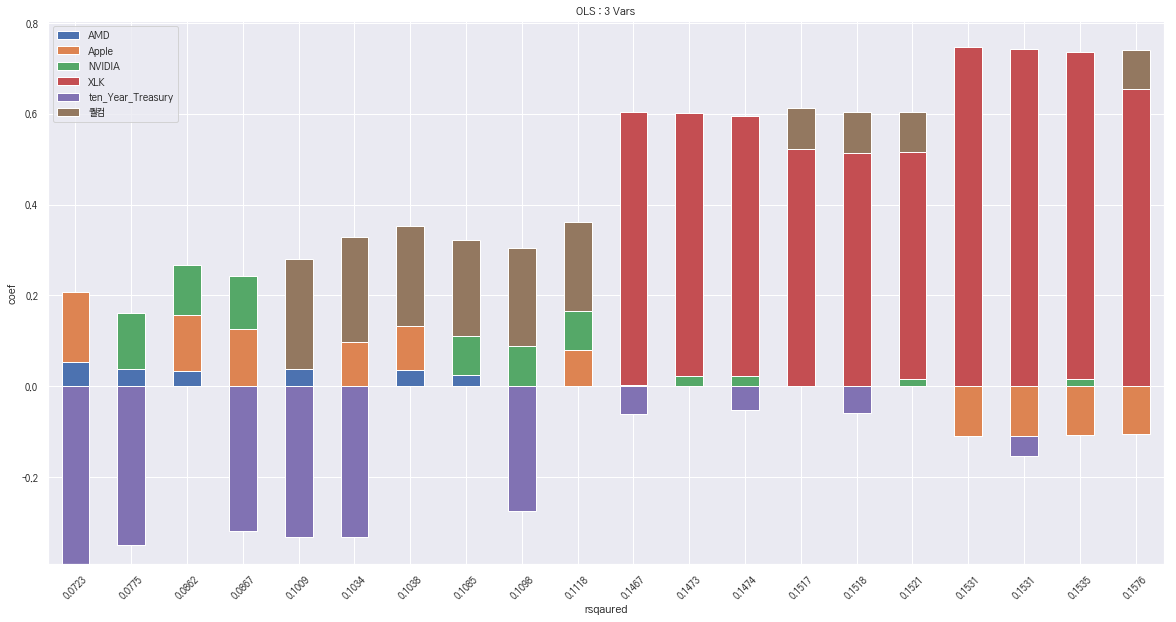

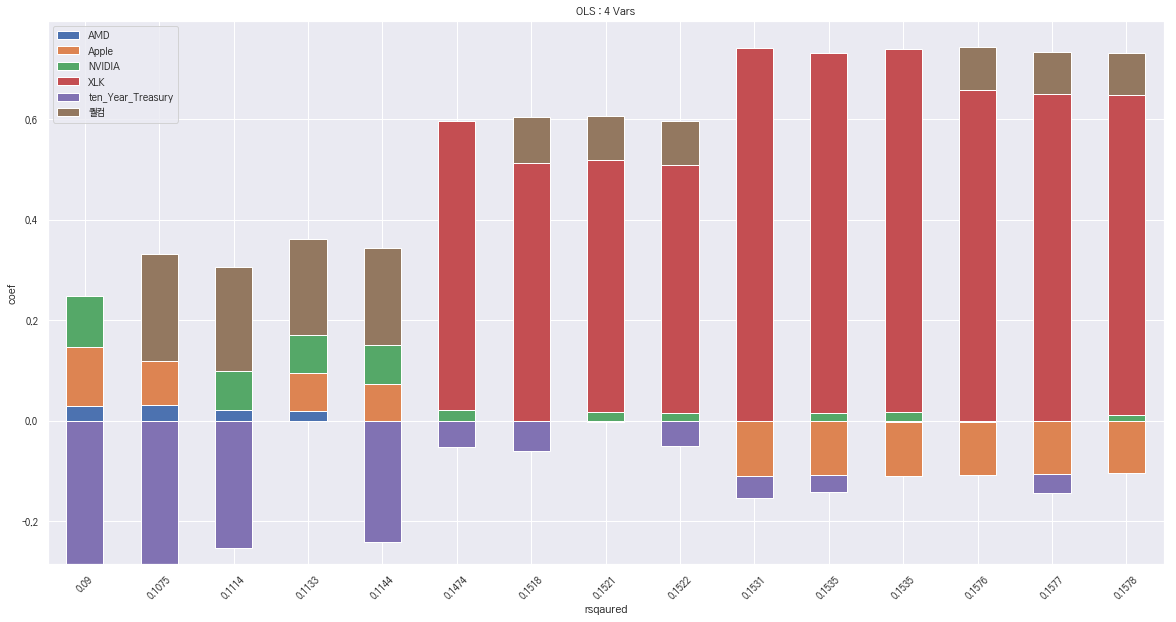

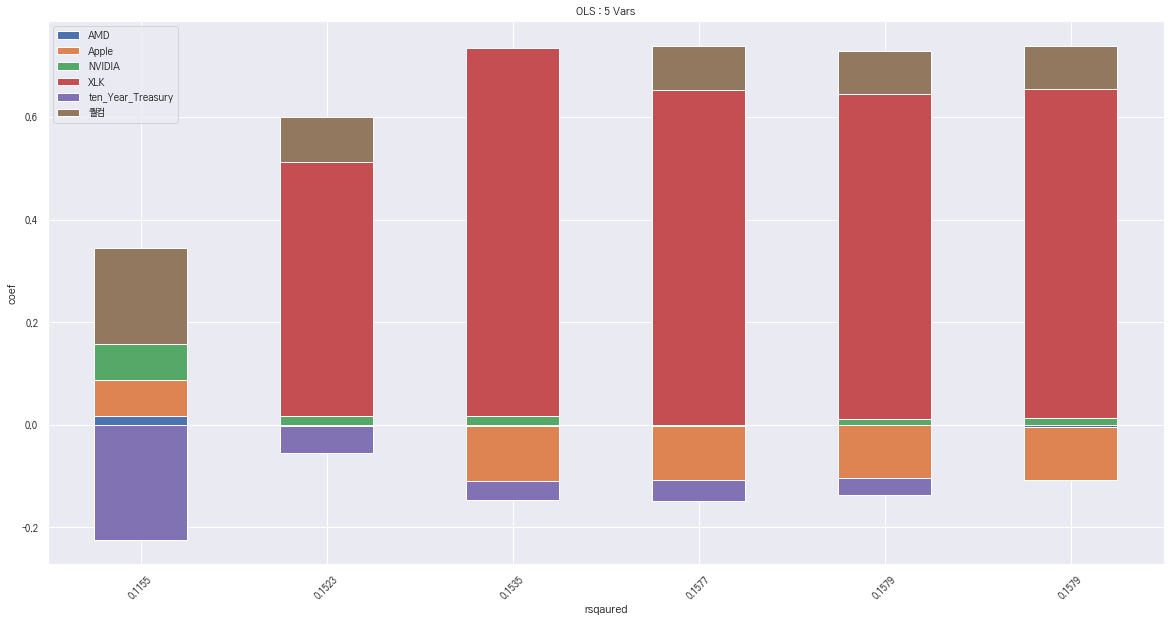

In [5]:
an.ols_comb(comb_num=1,dep='Samsung_Electronics',inds=stan_US,weekly=True,show_summary=False,show_plot=True,start='2010-01-04')
an.ols_comb(comb_num=2,dep='Samsung_Electronics',inds=stan_US,weekly=True,show_summary=False,show_plot=True,start='2010-01-04')
an.ols_comb(comb_num=3,dep='Samsung_Electronics',inds=stan_US,weekly=True,show_summary=False,show_plot=True,start='2010-01-04')
an.ols_comb(comb_num=4,dep='Samsung_Electronics',inds=stan_US,weekly=True,show_summary=False,show_plot=True,start='2010-01-04')
an.ols_comb(comb_num=5,dep='Samsung_Electronics',inds=stan_US,weekly=True,show_summary=False,show_plot=True,start='2010-01-04')

# [데이터 확인](#INDEX)<a name="확인"></a>

2016년부터 2018년 까지의 데이터 plotting.

In [ ]:
an.isValid(stan_US,start='2010-01-04')

In [ ]:
an.isValid(ten_kor)
#an.isValid(ten_US)

# [Symbol List 초기화 & 불러오기](#INDEX)<a name="init"></a>
+ IXT 같은 index 는 잘 안불러진다.
+ 잘 받았는지 검증하는 루틴이 필요함. 

In [2]:
df = sl.init_symbol_DF()
sl.add_symbol(df,'삼성SDS','018260.KS',init=True)
df = sl.init_symbol_DF()

DUP : 삼성SDS
DUP : Apple
DUP : Microsoft
DUP : IBM
DUP : Oracle
DUP : Amazon
DUP : Tesla
DUP : Alphabet
DUP : Facebook
DUP : Cisco
DUP : 타이완 반도체
DUP : Intel
DUP : 오라클
DUP : SAP
ADD : NVIDIA
ADD : 퀄컴
ADD : AMD
DUP : Samsung_Electronics
DUP : SK_hynix
DUP : LG_Electronics
DUP : 삼성SDI
DUP : 엔씨소프트
DUP : 삼성SDS
DUP : 카카오
DUP : 삼성전기
DUP : LG디스플레이
DUP : 네이버
DUP : KOSPI
DUP : XLK
DUP : BitCoin
DUP : MSCI
DUP : ten_Year_Treasury
DUP : VIX
DUP : SONY


# [Symbol List 에서 데이터 받기](#INDEX)<a name="down"></a>

TODO::이전에 받은 날짜에 이어서 붙이는거 추가하자.

In [3]:
sl.download()

Note::Processing  삼성SDS
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Apple
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Microsoft
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  IBM
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Oracle
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Amazon
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Tesla
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Alphabet
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Facebook
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  Cisco
[*********************100%***********************]  1 of 1 downloaded
Note::Processing  타이완 반도체
[*********************10

# [co-kurtosis WIP](#INDEX)<a name="cokur"></a>
+ how to calculate coskew and cokurtosis
https://stackoverflow.com/questions/41890870/how-to-calculate-coskew-and-cokurtosis

생각을 좀 해봐야겠다.

$$ K(X,X,Y,Y)= {E[(X - E[X])^2(Y - E[Y]^2)] \over \sigma_X^2\sigma_Y^2}$$

변화율로 가야하나, 정규화를 해야하나, 그냥 해도 되나

```python
def cokur(
    target1,
    target2,
    start='2016-01-04',
    end='2018-12-28',
    engine='c',
    value = 'Close'
    ):  
    ```

In [ ]:
df_cokur = pd.DataFrame(columns=['Samsung_Electronics'])
for stans in stan_US:
    tmp = an.cokur('Samsung_Electronics',stans)
    df_cokur.loc[stans] = [tmp['Close']]
display(df_cokur)
df_cokur.plot(kind='bar',rot=45,title='Co-Kurtosis')


# [Joint plot](#INDEX)<a name="joint"></a>
https://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
for idx in stan_US:
    an.joint('Samsung_Electronics',idx)

In [ ]:
for idx in range(0,len(ten_US)):
    an.joint(ten_US[idx],index_kor)

# [Correlation](#INDEX)<a name="corr"></a>

In [ ]:
df_corr = pd.DataFrame(columns=['Samsung_Electronics'])
for stans in stan_US:
    tmp = an.cokur('Samsung_Electronics',stans)
    df_corr.loc[stans] = [tmp['Close']]
display(df_corr)
df_corr.plot(kind='bar',rot=45,title='corr')

## 추후 계획
코스피와 MSCI 신흥국 지수의 상관관계를 확인하는 과정도 필요할 것으로 예상된다. 삼성전자가 코스피 지수에서 차지하는 비중이 매우 큰데 이러한 과정이 MSCI 신흥국 지수에도 분명 영향을 끼칠 것으로 예상되기 때문이다. 이러한 설명 변수 간의 상관관계는 결국 공선성으로 인해 회귀 분석 결과에 오류로 이어질 것이고, 이를 해결하기 위해서는 VAR 모형을 이용하는 것도 고려 중에 있다.